In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
array_booleano = np.full((1000,), False, dtype=bool)
print(f'Tamaño de elementos: {array_booleano.size}')
print(f'Tamaño (bytes): {array_booleano.nbytes}')

Tamaño de elementos: 1000
Tamaño (bytes): 1000


In [4]:
enteros_pares = np.arange(2,101,2)
enteros_pares_desc = np.sort(enteros_pares)[::-1]
print(enteros_pares_desc[0:10])

[100  98  96  94  92  90  88  86  84  82]


In [5]:
array_dado = np.array([[2,4,5,6],[0,3,7,4],[8,8,5,2],[1,5,6,1]])
print(array_dado)

[[2 4 5 6]
 [0 3 7 4]
 [8 8 5 2]
 [1 5 6 1]]


In [7]:
print(array_dado[1:2,])

[[0 3 7 4]]


In [16]:
slice_subarray = np.array([[array_dado[0,0], array_dado[0,2]],[array_dado[2,1],array_dado[2,2]]])
print(slice_subarray)

[[2 5]
 [8 5]]


In [20]:
a = np.array([1,4,2,7])
b = np.array([1,3,2,9])
print(a-b)
print(f'La media aritmetica de la resta a-b es: {np.mean(a-b)}')

[ 0  1  0 -2]
La media aritmetica de la resta a-b es: -0.25


In [42]:
coordenadas = np.array([[1.33, 4.5], [30.0, 10.7], [70.2, 0.5]])
coordenadas = np.append(coordenadas, [[37.1, -3.6]], axis=0)

print(coordenadas.shape)

(4, 2)


In [44]:
coordenadas2 = coordenadas.T
print(coordenadas2)
print()
coordenadas_transp = np.array([[10.8, 3.0], [35.8,12.0]])
coordenadas2 = np.append(coordenadas2, coordenadas_transp.T, axis=1)
print(coordenadas2)

[[ 1.33 30.   70.2  37.1 ]
 [ 4.5  10.7   0.5  -3.6 ]]

[[ 1.33 30.   70.2  37.1  10.8  35.8 ]
 [ 4.5  10.7   0.5  -3.6   3.   12.  ]]


In [76]:
dataset = pd.read_csv('NucleosPoblacion.csv')
df = pd.DataFrame(dataset)
print(df.shape)

(852, 10)


In [69]:
df.head()

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


In [71]:
Municipios_100K = df[df.Poblacion >= 100000] #indexacion booleana
print(f'Existen {Municipios_100K.shape[0] } municipios con 100,000 habitantes o mas')


Existen 62 municipios con 100,000 habitantes o mas


<BarContainer object of 852 artists>

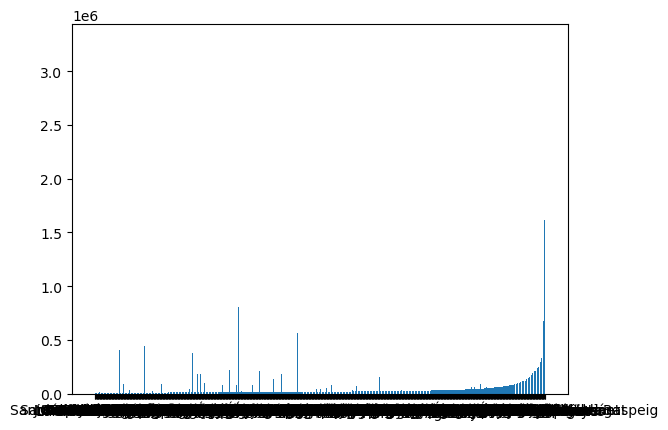

In [92]:
df_ascendente = df.sort_values("Poblacion", ascending=True)
plt.bar(df_ascendente['Municipio'],df_ascendente['Poblacion'])

In [91]:
df_ascendente = df.sort_values("Poblacion", ascending=True)
df_excel = df_ascendente.iloc[:, [3, 5]]

df_excel.to_excel('OrdenAscendente.xlsx', index=True)
